# **Fertilizer Recommendation System**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report

# **Attributes Description**
    N - ratio of Nitrogen content in soil

    P - ratio of Phosphorous content in soil

    K - ratio of Potassium content in soil

    temperature - temperature in degree Celsius

    humidity - relative humidity in %

    Moisture in Soil

    Soil Type

    Crop Type

# **Exploring the Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
data.shape

(99, 9)

In [ ]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

# **Let us checked the  outlier in the dataset**

In [ ]:
print(max(data['Temparature']), data['Temparature'].idxmax())
print(max(data['Humidity ']), data['Humidity '].idxmax())
print(max(data['Moisture']), data['Moisture'].idxmax())
print(max(data['Nitrogen']), data['Nitrogen'].idxmax())
print(max(data['Potassium']), data['Potassium'].idxmax())
print(max(data['Phosphorous']), data['Phosphorous'].idxmax())

38 45
72 96
65 12
42 73
19 68
42 53


# **Potassium in this feature one outliner**

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


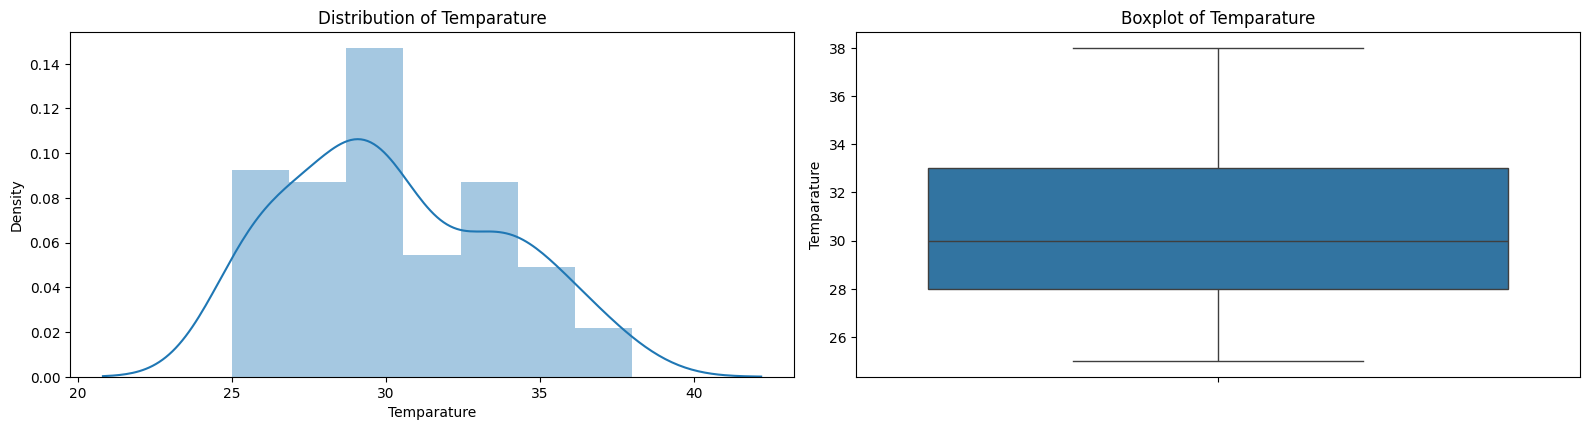

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


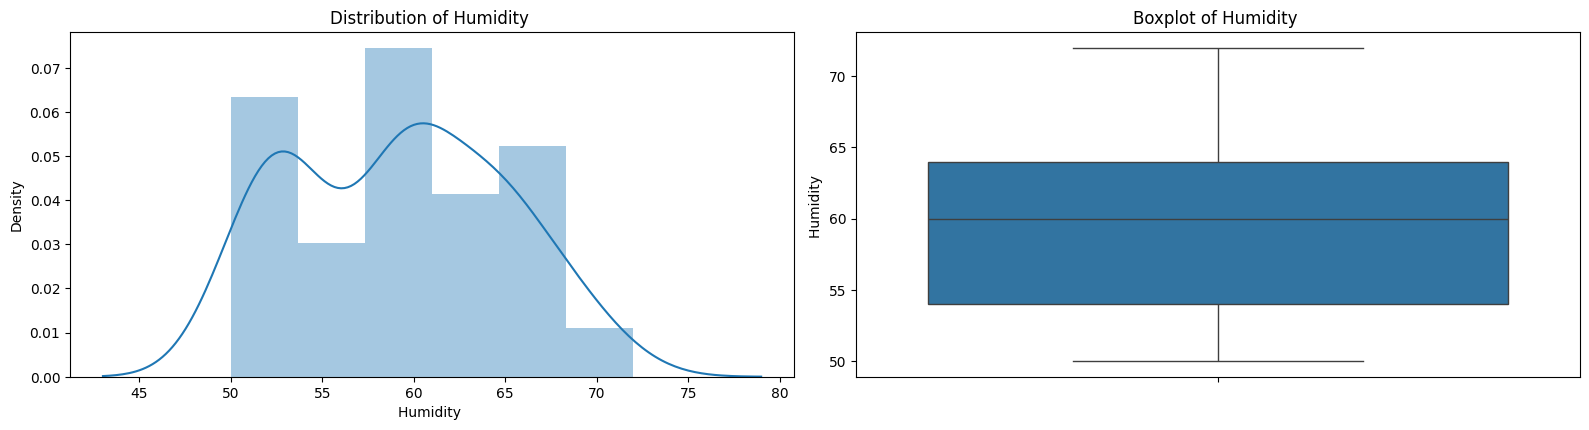

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


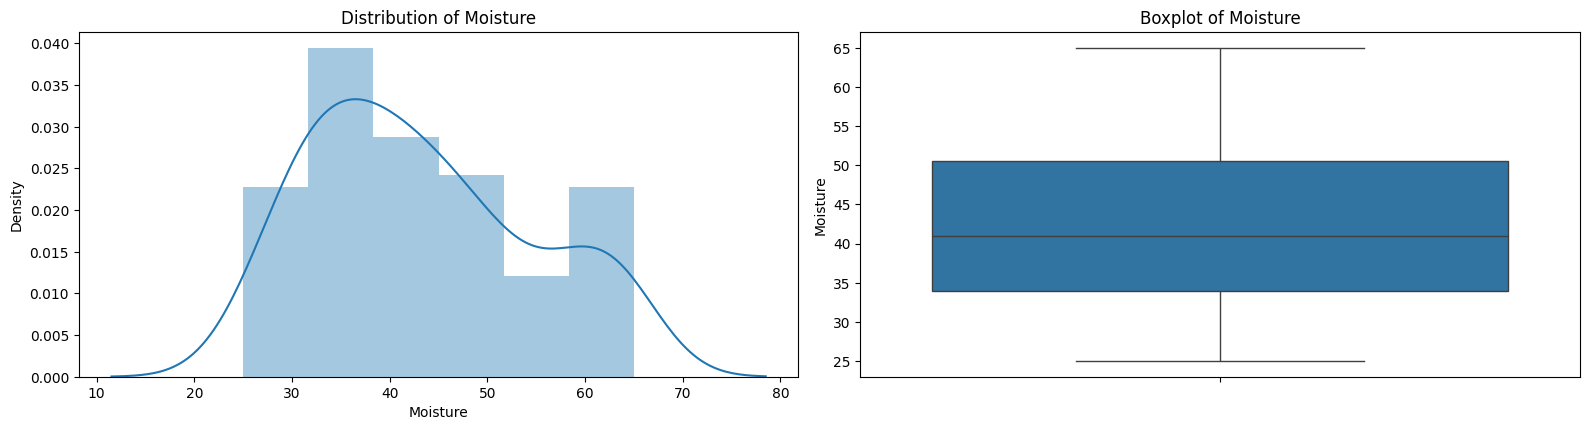

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


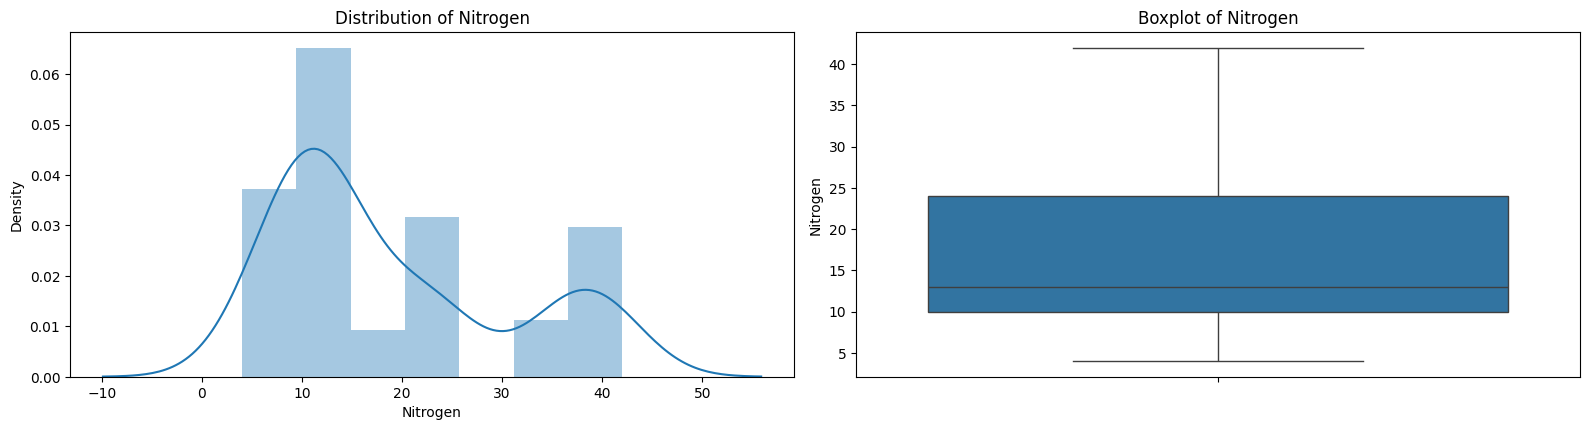

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


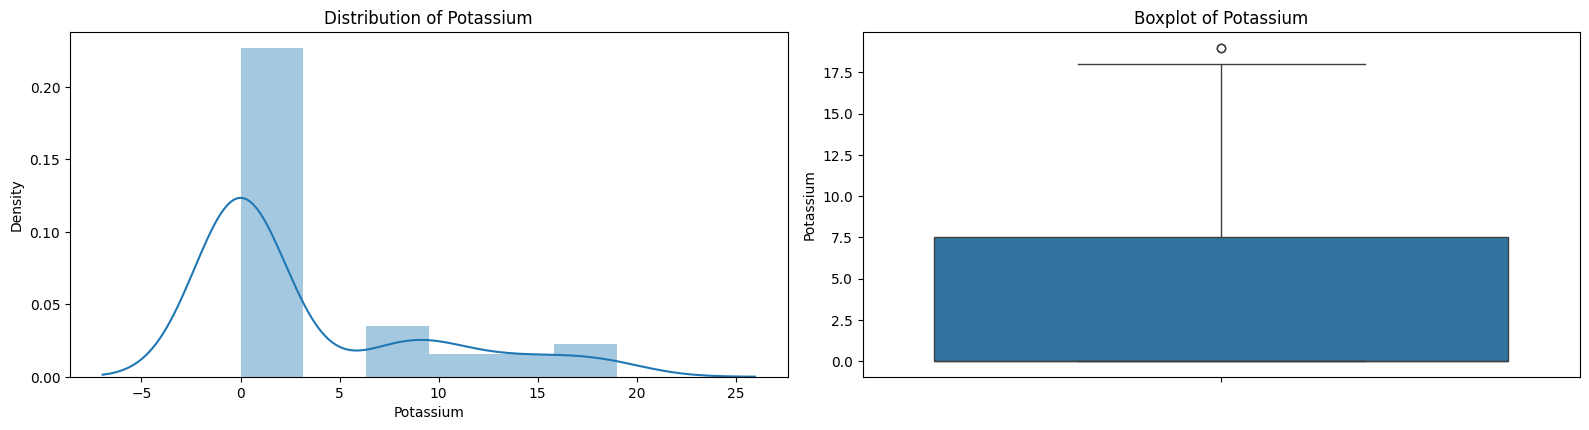

<ipython-input-8-c611dea91fb9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


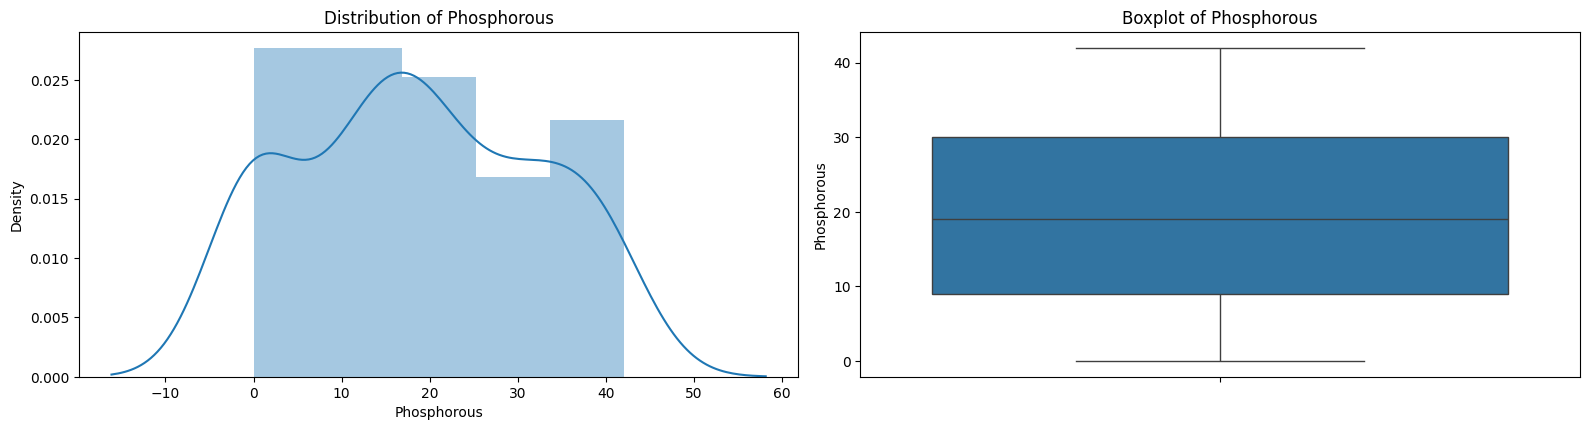

In [ ]:
a = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for i in a:
    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    sns.distplot(data[i])
    plt.title('Distribution of ' + i)

    plt.subplot(2, 2, 2)
    sns.boxplot(data[i])
    plt.title('Boxplot of ' + i)

    plt.tight_layout()
    plt.show()

In [ ]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


In [ ]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       'NPK 10-26-26'], dtype=object)

In [ ]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

# **Analysis**

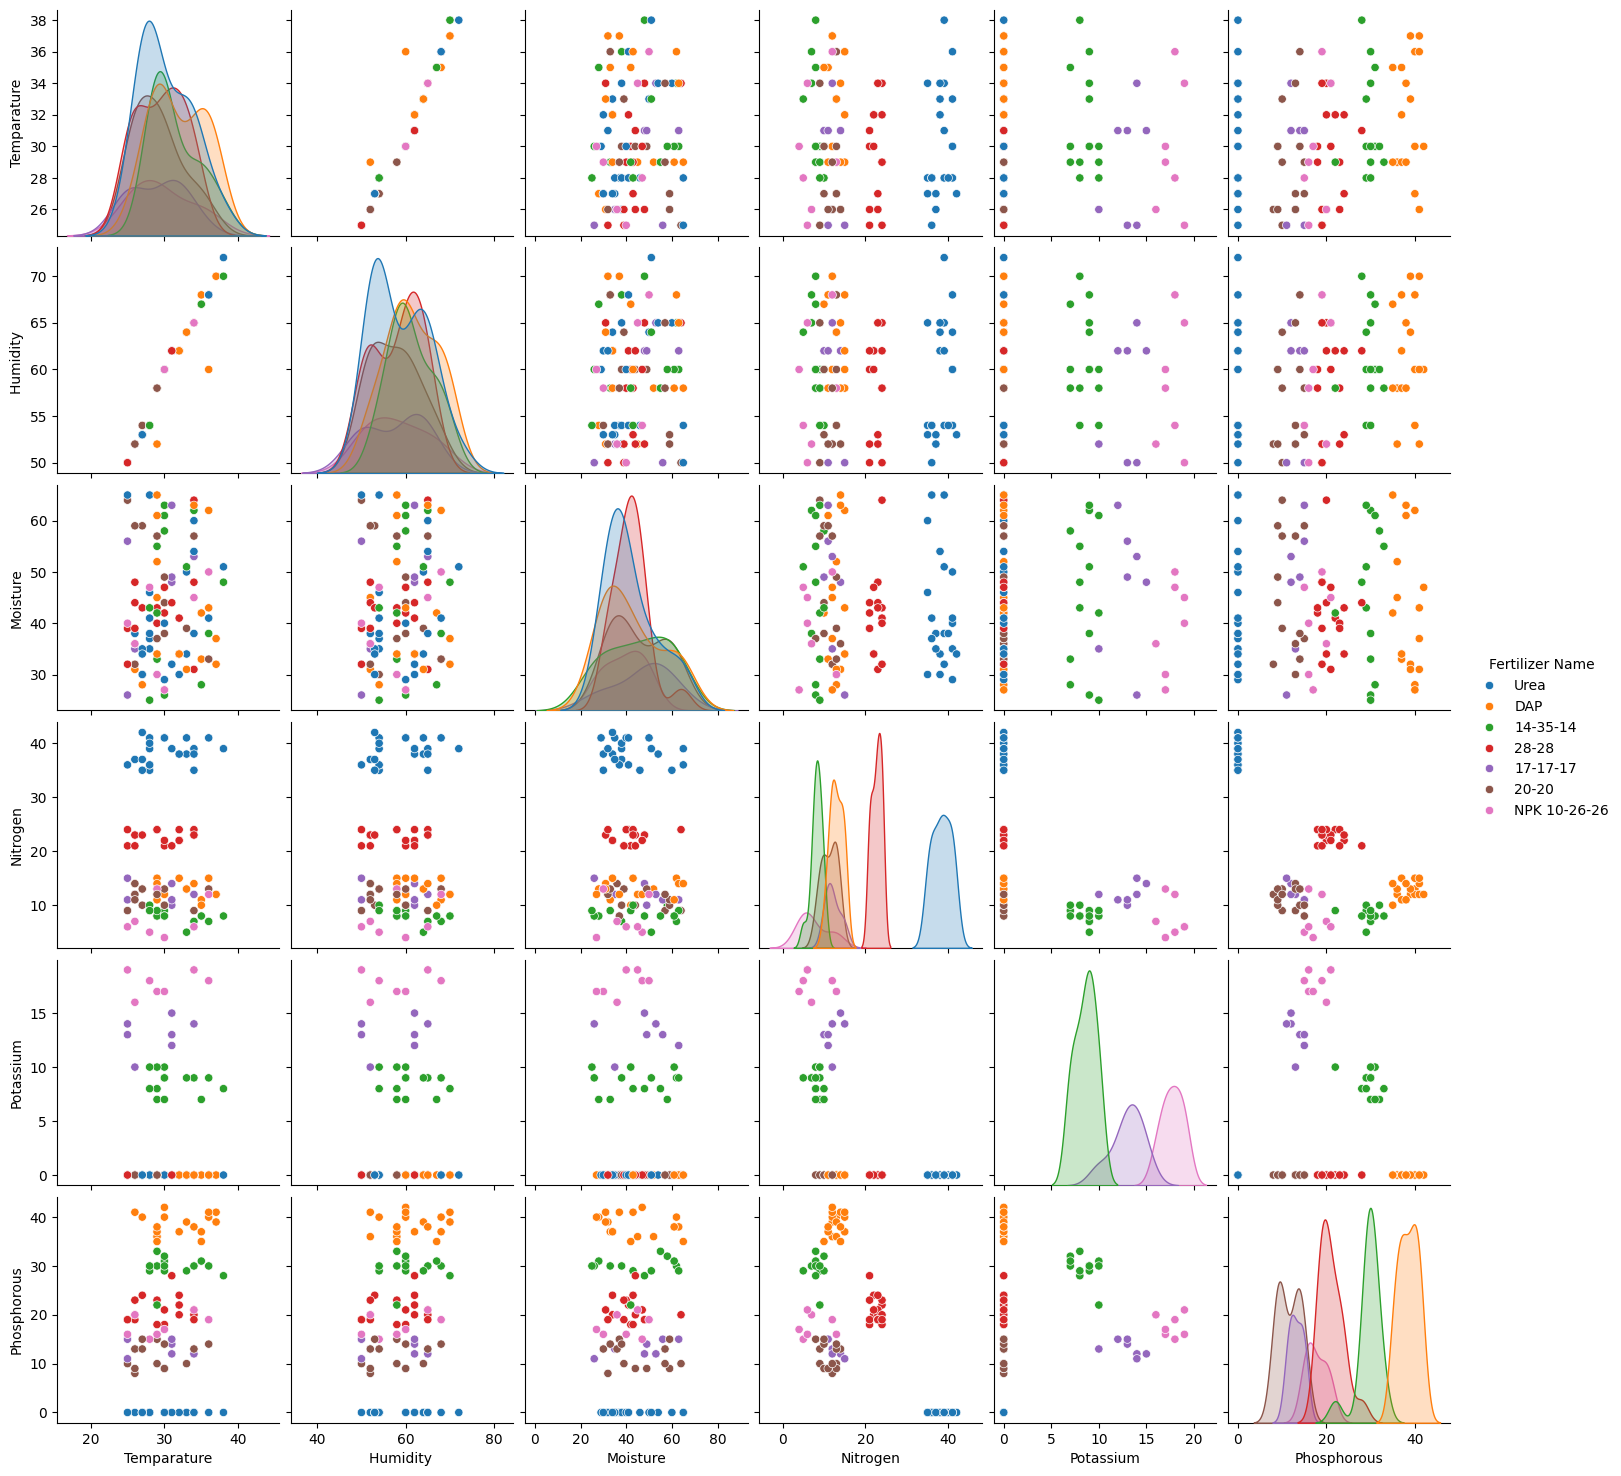

In [ ]:
sns.pairplot(data, hue='Fertilizer Name')

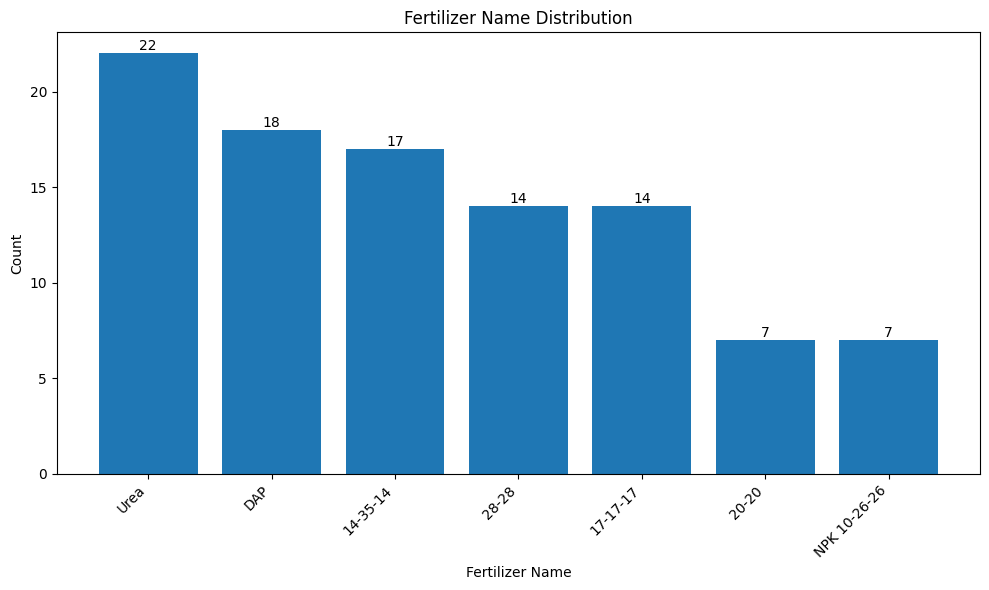

In [ ]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(labels, counts)  # Use bar for vertical bar chart

# Add labels and title
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.title('Fertilizer Name Distribution')

# Add text annotations
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

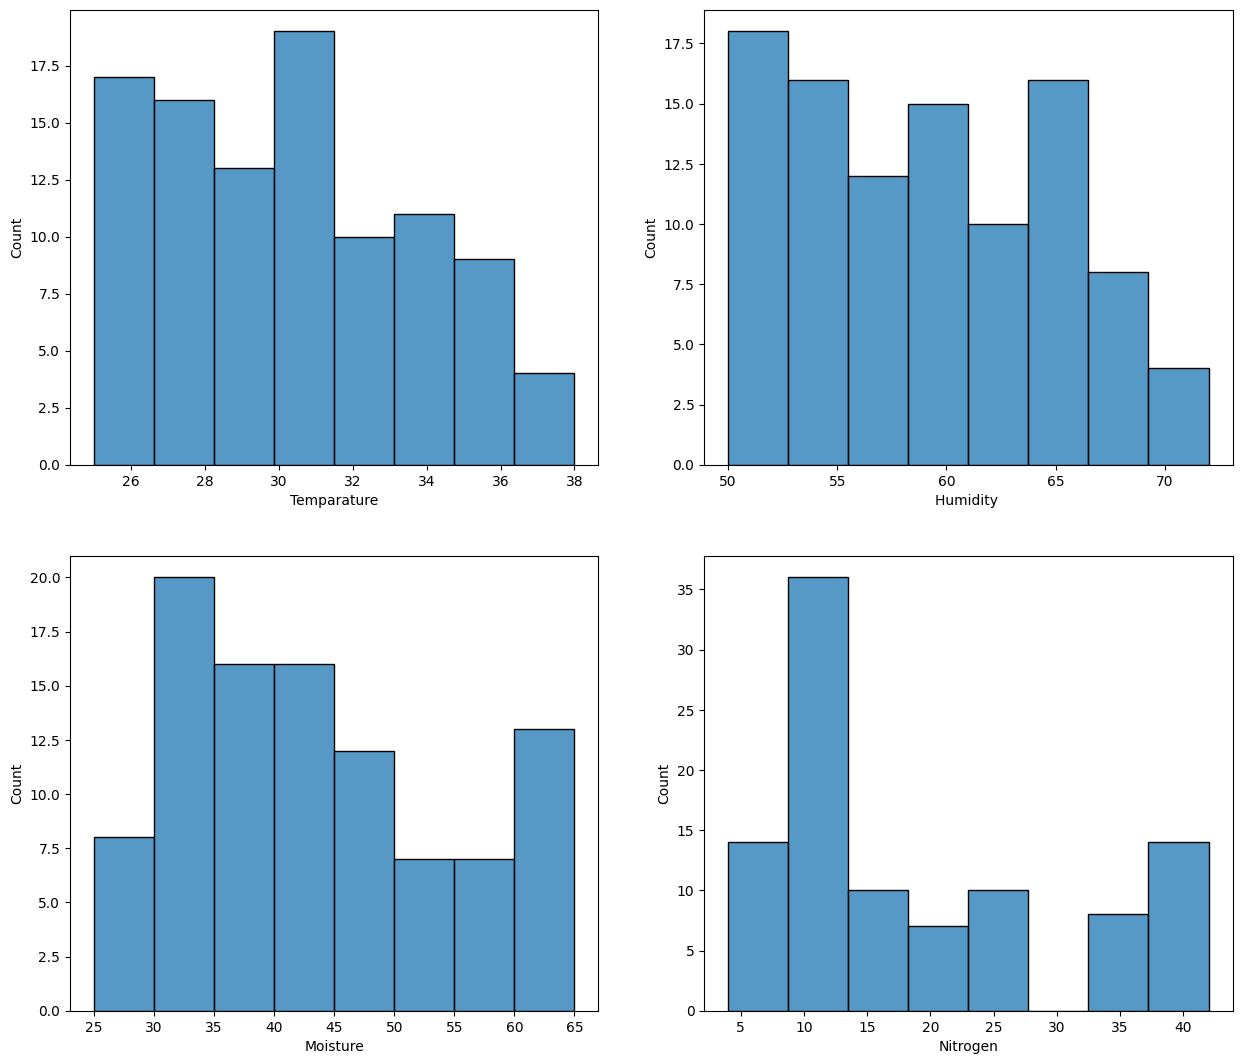

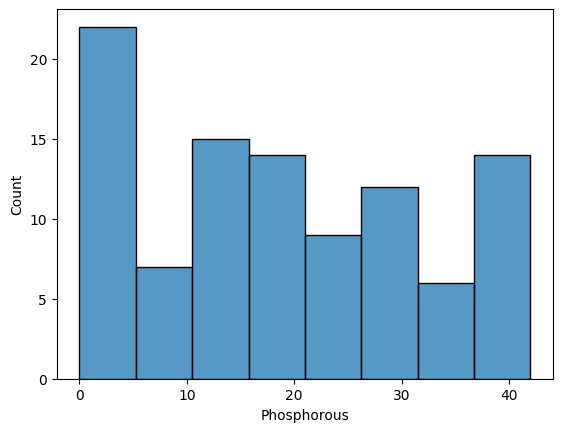

In [ ]:
plt.figure(figsize=(15,13))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[continuous_data_cols[-1]])
plt.show()

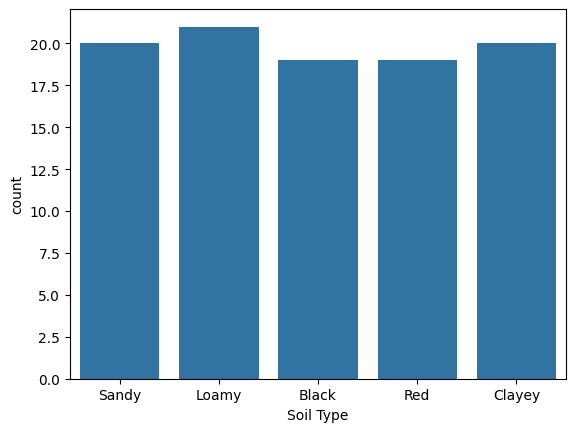

In [ ]:
sns.countplot(x='Soil Type', data = data)
plt.show()

<Axes: xlabel='Crop Type', ylabel='count'>

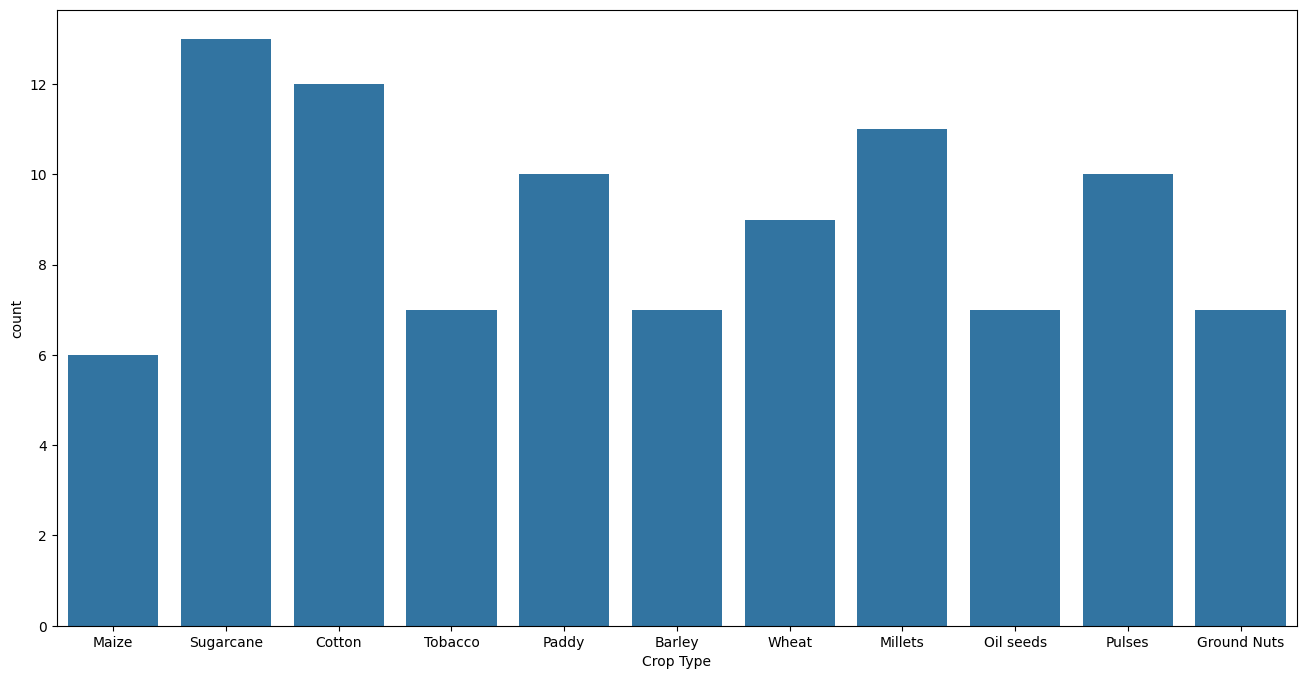

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = data)

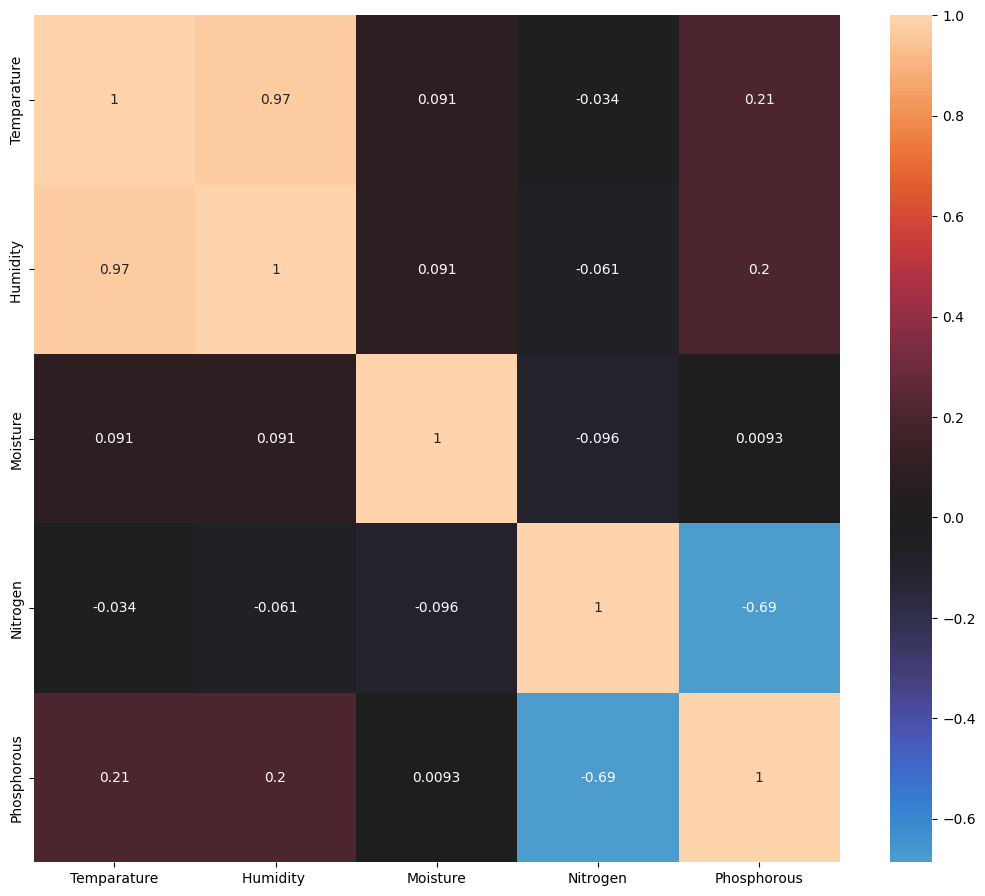

In [ ]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

<ipython-input-22-38d38c2a6620>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr())


<Axes: >

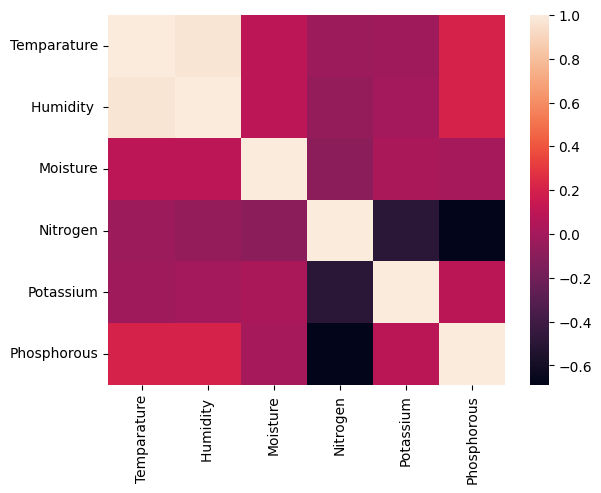

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr())
dataplot

In [ ]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [ ]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [ ]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [ ]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}
{0: '14-35-14', 1: '17-17-17', 2: '20-20', 3: '28-28', 4: 'DAP', 5: 'NPK 10-26-26', 6: 'Urea'}


In [ ]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,4
2,34,65,62,0,1,7,9,30,0
3,32,62,34,3,9,22,0,20,3
4,28,54,46,1,6,35,0,0,6


In [ ]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
selected_columns = data[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
selected_columns

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19
95,30,60,27,3,9,4,17,17
96,38,72,51,2,10,39,0,0
97,36,60,43,4,4,15,0,41


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_columns, data['Fertilizer Name'], random_state=5, test_size=0.30)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(X_train)

In [ ]:
x_test = scaler.transform(X_test)


# **RandomForestClassifier**

In [ ]:
model = RandomForestClassifier(max_samples=0.75, random_state = 42,oob_score = True)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('Accuracy score of the RandomForestClassifier model is ',accuracy_score(y_test, y_predicted))
print('F1 Score of the RandomForestClassifier is ',f1_score(y_test,y_predicted,average='micro'))
confusion_matrix(y_test, y_predicted)

Accuracy score of the RandomForestClassifier model is  0.9333333333333333
F1 Score of the RandomForestClassifier is  0.9333333333333333


array([[0, 0, 0, 0, 0, 0],
       [0, 6, 1, 0, 0, 0],
       [0, 0, 7, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8]])

# ***GridSearchCV***

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

1.0

# **RandomSearchCV**

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/py

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_grid.best_score_

1.0

# **DecisionTreeClassifier**

Accuracy score of the DecisionTreeClassifier model is  0.9666666666666667
F1 Score of the DecisionTreeClassifier model is  0.9666666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

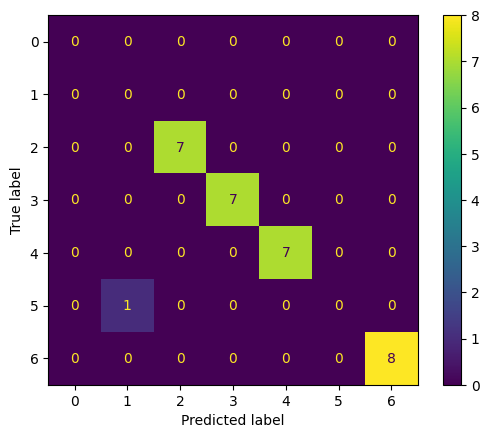

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5,splitter="random")
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print('Accuracy score of the DecisionTreeClassifier model is ',accuracy_score(y_test, y_predicted))
print('F1 Score of the DecisionTreeClassifier model is ',f1_score(y_test,y_predicted,average='micro'))

print(classification_report(y_test,y_predicted))

cm = confusion_matrix(y_test, y_predicted,labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
display.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth=5,splitter="random"), X_train, y_train, cv = 10, scoring = 'accuracy'))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.9142857142857143

In [ ]:
for importance,name in sorted(zip(clf.feature_importances_,X_train.columns),reverse=True):
  print(name,importance)

Nitrogen 0.39525761566120304
Phosphorous 0.2878979128605436
Potassium 0.2794088295583065
Humidity  0.03743564191994687
Temparature 0.0
Soil Type 0.0
Moisture 0.0
Crop Type 0.0


[Text(0.625, 0.875, 'x[7] <= 34.023\ngini = 0.843\nsamples = 69\nvalue = [14, 7, 7, 10, 11, 6, 14]'),
 Text(0.5, 0.625, 'x[6] <= 5.075\ngini = 0.814\nsamples = 58\nvalue = [14, 7, 7, 10, 0, 6, 14]'),
 Text(0.25, 0.375, 'x[7] <= 13.532\ngini = 0.641\nsamples = 31\nvalue = [0, 0, 7, 10, 0, 0, 14]'),
 Text(0.125, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [0, 0, 5, 0, 0, 0, 14]'),
 Text(0.375, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [0, 0, 2, 10, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[7] <= 27.941\ngini = 0.615\nsamples = 27\nvalue = [14, 7, 0, 0, 0, 6, 0]'),
 Text(0.625, 0.125, 'gini = 0.561\nsamples = 14\nvalue = [1, 7, 0, 0, 0, 6, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 11, 0, 0]')]

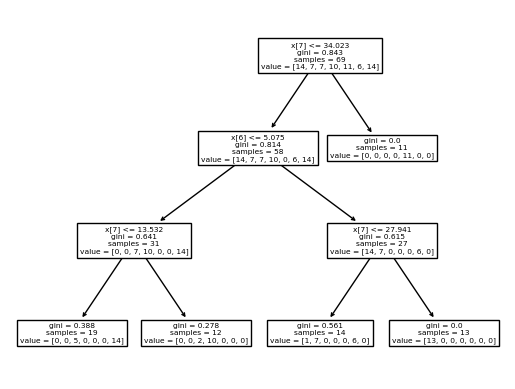

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00


# **Logistic Regression**

In [ ]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
print('Accuracy score of the logistic regression model is ',accuracy_score(y_test, y_predicted))

print('F1 Score of the logistic regression model is ',f1_score(y_test,y_predicted,average='weighted'))
confusion_matrix(y_test, y_predicted)

Accuracy score of the logistic regression model is  0.8666666666666667
F1 Score of the logistic regression model is  0.8661538461538462


array([[0, 0, 0, 0, 0, 0],
       [0, 6, 1, 0, 0, 0],
       [0, 2, 5, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8]])

# **SVM**

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
print('Accuracy score of the svc model is ',accuracy_score(y_test, y_predicted))
print('F1 Score of the svc model is ',f1_score(y_test,y_predicted,average='micro'))
confusion_matrix(y_test, y_predicted)

Accuracy score of the svc model is  0.9666666666666667
F1 Score of the svc model is  0.9666666666666667


array([[0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8]])

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
print('Accuracy score of the svc model is ',accuracy_score(y_test, y_predicted))
print('F1 Score of the svc model is ',f1_score(y_test,y_predicted,average='micro'))
confusion_matrix(y_test, y_predicted)

Accuracy score of the svc model is  0.6666666666666666
F1 Score of the svc model is  0.6666666666666666


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 3, 0, 0, 0],
       [0, 0, 4, 3, 0, 0, 0],
       [2, 0, 0, 0, 5, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8]])

# **KNN**


Accuracy at k = 1 is 0.7
Accuracy at k = 2 is 0.55
Accuracy at k = 3 is 0.6
Accuracy at k = 4 is 0.55
Accuracy at k = 5 is 0.55
Accuracy at k = 6 is 0.6
Accuracy at k = 7 is 0.6
Accuracy at k = 8 is 0.6
Accuracy at k = 9 is 0.5
Accuracy at k = 10 is 0.5
Accuracy at k = 11 is 0.6
Accuracy at k = 12 is 0.6
Accuracy at k = 13 is 0.6
Accuracy at k = 14 is 0.6
Accuracy at k = 15 is 0.5
Accuracy at k = 16 is 0.55
Accuracy at k = 17 is 0.55
Accuracy at k = 18 is 0.5
Accuracy at k = 19 is 0.55
Accuracy at k = 20 is 0.65
Accuracy at k = 21 is 0.65
Accuracy at k = 22 is 0.65
Accuracy at k = 23 is 0.65
Accuracy at k = 24 is 0.65
Accuracy at k = 25 is 0.65
Accuracy at k = 26 is 0.6
Accuracy at k = 27 is 0.6
Accuracy at k = 28 is 0.6
Accuracy at k = 29 is 0.6
Accuracy at k = 30 is 0.6
Accuracy at k = 31 is 0.6
Accuracy at k = 32 is 0.5
Accuracy at k = 33 is 0.45
Accuracy at k = 34 is 0.5
Accuracy at k = 35 is 0.45
Accuracy at k = 36 is 0.45
Accuracy at k = 37 is 0.45
Accuracy at k = 38 is 0.55
Accu

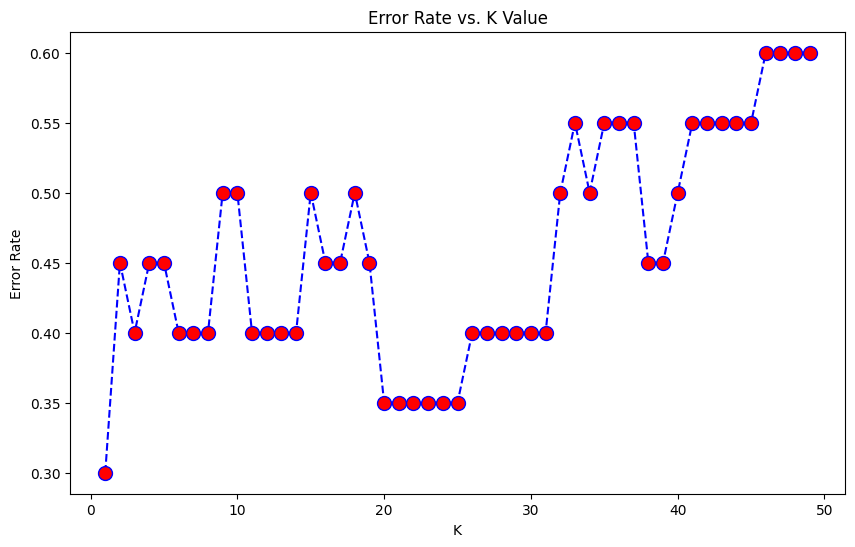

In [ ]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
# Create and train the RandomForestClassifier
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Dictionary for Crop Types
crop_type_dict = {
    0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets',
    5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'
}

# Dictionary for Soil Types
soil_type_dict = {
    0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'
}

# Take user input for all features
temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
moisture = float(input("Enter Moisture: "))

# Display options for Crop Type
print("Choose Crop Type:")
for key, value in crop_type_dict.items():
    print(f"{key}: {value}")
crop_type = int(input("Enter the number corresponding to Crop Type: "))

# Display options for Soil Type
print("Choose Soil Type:")
for key, value in soil_type_dict.items():
    print(f"{key}: {value}")
soil_type = int(input("Enter the number corresponding to Soil Type: "))

nitrogen = float(input("Enter Nitrogen: "))
potassium = float(input("Enter Potassium: "))
phosphorous = float(input("Enter Phosphorous: "))

# Now you can make predictions based on user input
user_input = [[temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous]]
prediction = model.predict(user_input)[0]

# Map the predicted class to the corresponding output
if prediction == 0:
    print("Recommended Fertilizer: 10-26-26")
elif prediction == 1:
    print("Recommended Fertilizer: 14-35-14")
elif prediction == 2:
    print("Recommended Fertilizer: 17-17-17")
elif prediction == 3:
    print("Recommended Fertilizer: 20-20")
elif prediction == 4:
    print("Recommended Fertilizer: 28-28")
elif prediction == 5:
    print("Recommended Fertilizer: DAP")
else:
    print("Recommended Fertilizer: Urea")

Enter Temperature: 23
Enter Humidity: 43
Enter Moisture: 32
Choose Crop Type:
0: Barley
1: Cotton
2: Ground Nuts
3: Maize
4: Millets
5: Oil seeds
6: Paddy
7: Pulses
8: Sugarcane
9: Tobacco
10: Wheat
Enter the number corresponding to Crop Type: 9
Choose Soil Type:
0: Black
1: Clayey
2: Loamy
3: Red
4: Sandy
Enter the number corresponding to Soil Type: 3
Enter Nitrogen: 22
Enter Potassium: 1
Enter Phosphorous: 2
Recommended Fertilizer: Urea


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
